<a href="https://colab.research.google.com/github/sammainahkinya1404/A-novel-detection-method-based-on-DETR-for-drone-aerial-images/blob/main/Another_copy_of_Financial_Health_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required datasets at hand.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import the required libraries accordingly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import warnings

warnings.filterwarnings('ignore')


## Read our dataset using the pandas library

In [3]:
df = pd.read_csv("/content/drive/MyDrive/diaries_transactions_all.csv", header=0, skiprows=[4144,125092,14784,12602, 21292, 23459, 25582])

In [4]:
df.head(5)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03-Sep-12,02-Oct-13,394,13,04=Diaries Interview,02-Oct-13,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24-Sep-12,19-Sep-13,360,12,04=Diaries Interview,22-Apr-13,4,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20-Sep-12,22-Oct-13,397,13,04=Diaries Interview,02-Oct-13,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21-Sep-12,01-Nov-13,406,14,04=Diaries Interview,21-Feb-13,2,2013,...,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20-Sep-12,18-Oct-13,393,13,04=Diaries Interview,02-May-13,5,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


### Data preprocessing and viewing our data
##### Rename columns
##### Check for our columns datatypes
##### Check for nulls


---



In [5]:
df.rename(columns={'trx_date':'transaction_date','trx_month':'transaction_month','trx_year':'transaction_year','trx_yr_mo':'transaction_year_month'}, inplace=True)

In [6]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 483942
Number of columns: 58


#### Detect the missing values in a code

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 58 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
unique_hhs,483644,99.9
unique_hm_owner,483272,99.9
account_startclose_balance,477000,98.6
unique_accnts,474397,98.0
trx_inkind_value_kes,471144,97.4
trx_inkind_value_usd,471144,97.4
trx_inkind_units,470518,97.2
account_liquid,434022,89.7
trx_prx_purpose_fd,423992,87.6
trx_bsheet_direction,412747,85.3


#### Drop Na with values that are greater than 7000

In [9]:
def drop_columns_with_high_missing_values(df, threshold=6):

    # Calculate percentage of missing values for each column
    missing_percentages = 100 * df.isnull().sum() / len(df)

    # Identify columns where missing percentage exceeds the threshold
    columns_to_drop = missing_percentages[missing_percentages > threshold].index

    # Drop the identified columns from the DataFrame
    cleaned_df = df.drop(columns_to_drop, axis=1)

    return cleaned_df


In [10]:
cleaned_df = drop_columns_with_high_missing_values(df)
cleaned_df.dropna(inplace=True)



In [11]:
data = cleaned_df.to_csv('/content/clean_diaries.csv', index=False)

In [12]:
cleaned = pd.read_csv('/content/clean_diaries.csv')

# Input Features


#### 1.DateTransaction
Date of the transaction, providing temporal information.

#### 2.FamilyTransaction
Type of transaction family (e.g., deposits, withdrawals), indicating the nature of the financial activity.

#### 3.PurposeTransaction
Purpose or description of the transaction, providing context for the financial activity (e.g., savings contributions, loan repayments).

#### 4.ModeTransaction
Mode of the transaction (e.g., cash, mobile money transfer, bank transfer), indicating the payment method used.

#### 5.Value (KES)
Monetary value associated with each transaction, providing information on the amount of money involved.

#### 6.Transaction direction
Direction of the transaction (inflow or outflow), indicating whether money is entering or leaving the household.


In [13]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [15]:
# Label Encoding
label_columns = ['trx_class_code', 'trx_class_desc', 'trx_direction']

label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    cleaned[col] = le.fit_transform(cleaned[col])
    label_encoders[col] = le

# Binary Encoding
binary_columns = ['trx_family_code', 'trx_family_desc', 'trx_type_desc', 'trx_prx_purpose']
binary_encoder = ce.BinaryEncoder(cols=binary_columns, return_df=True)
cleaned = binary_encoder.fit_transform(cleaned)
cleaned.head()

,hh_ids,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,...,trx_prx_purpose_6,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_stdtime_mnths_hh_nr
0,KMOMB07,21-Sep-12,01-Oct-13,375,12,06=Cleaning interview,02-Oct-13,10,2013,2013_10,...,1,16.0,Automatic,0.0,1.651430,1,5000.0,58.823530,0,7.689655
1,KMOMT18,25-Sep-12,12-Nov-13,413,14,04=Diaries Interview,25-Oct-12,10,2012,2012_10,...,0,1.0,Cash,0.0,8.085859,1,2816.0,33.129410,0,0.758621
2,KMAKL13,01-Oct-12,02-Oct-13,366,12,04=Diaries Interview,29-May-13,5,2013,2013_05,...,0,1.0,Cash,1.0,0.000000,1,40.0,0.470588,0,8.068966
3,KMAKL21,28-Sep-12,04-Oct-13,371,12,04=Diaries Interview,04-Oct-13,10,2013,2013_10,...,0,1.0,Cash,1.0,0.000000,1,50.0,0.588235,0,12.586210
4,KELDL02,03-Sep-12,02-Oct-13,394,13,04=Diaries Interview,19-May-13,5,2013,2013_05,...,1,1.0,Cash,1.0,0.000000,0,500.0,5.882353,0,6.758621


In [16]:
# droping hh_ids and other redundant  columns
cleaned.drop(['hh_ids','interview_designation','int_month',
                 'int_year','int_yr_mo','first_int_date','account_ids',
                 'm_ids_owner','tot_acc_monthsofobs','trx_id','m_ids_trx',
                 'transaction_month','transaction_year','trx_dq_round',
                 'trx_stdtime_days_hh','trx_stdtime_mnths_hh',
                 'trx_stdtime_days_acc','trx_stdtime_mnths_acc',
                 'ddd_gift','trx_distance_km'], axis=1, inplace=True)


#Date Range Features
first_trx_date_hh

The first transaction date for the household.
last_trx_date_hh

The last transaction date for the household.
tot_hh_daysofobs

Total number of days the household has been observed.

tot_hh_monthsofobs
Total number of months the household has been observed.

#Account-Level Date Range Features

first_trx_date_acc

The first transaction date for the account.


last_trx_date_acc
The last transaction date for the account.

tot_acc_daysofobs

Total number of days the account has been observed.

#Transaction Date
transaction_date
Date of the transaction.

transaction_year_month

Year and month of the transaction.

#First Transaction Date for Household (hh)
This column captures the initiation date of transactions for the household. It signifies when the household began interacting with the financial system.

#Last Transaction Date for Household (hh)
This column denotes the most recent transaction date observed for the household. It reflects the latest engagement of the household with financial transactions.

In [17]:
# Drop all date-related columns except first_trx_date_hh and last_trx_date_hh
cleaned.drop(['tot_hh_daysofobs', 'tot_hh_monthsofobs', 'int_date',
                 'first_trx_date_acc', 'last_trx_date_acc', 'tot_acc_daysofobs',
                 'transaction_date', 'transaction_year_month'], axis=1, inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Normalization
scaler = StandardScaler()
cleaned['trx_value_kes'] = scaler.fit_transform(cleaned[['trx_value_kes']])

In [19]:
cleaned.head(10)

,first_trx_date_hh,last_trx_date_hh,trx_class_code,trx_class_desc,trx_family_code_0,trx_family_code_1,trx_family_code_2,trx_family_code_3,trx_family_code_4,trx_family_code_5,...,trx_prx_purpose_4,trx_prx_purpose_5,trx_prx_purpose_6,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_direction,trx_value_kes,trx_value_usd,trx_stdtime_mnths_hh_nr
0,21-Sep-12,01-Oct-13,1,1,0,0,0,0,0,1,...,0,0,1,16.0,Automatic,0.0,1,1.120341,58.823530,7.689655
1,25-Sep-12,12-Nov-13,3,3,0,0,0,0,1,0,...,0,1,0,1.0,Cash,0.0,1,0.568204,33.129410,0.758621
2,01-Oct-12,02-Oct-13,3,3,0,0,0,0,1,1,...,0,1,0,1.0,Cash,1.0,1,-0.133596,0.470588,8.068966
3,28-Sep-12,04-Oct-13,3,3,0,0,0,0,1,0,...,0,1,0,1.0,Cash,1.0,1,-0.131068,0.588235,12.586210
4,03-Sep-12,02-Oct-13,2,2,0,0,0,1,0,0,...,0,1,1,1.0,Cash,1.0,0,-0.017303,5.882353,6.758621
5,04-Oct-12,27-Sep-13,3,3,0,0,0,0,1,0,...,0,1,0,1.0,Cash,1.0,1,-0.134860,0.411765,11.310340
6,05-Sep-12,07-Oct-13,3,3,0,0,0,1,0,1,...,0,1,0,1.0,Cash,1.0,1,-0.138652,0.235294,4.965517
7,01-Oct-12,28-Oct-13,2,2,0,0,0,1,1,0,...,1,0,0,1.0,Cash,1.0,0,-0.118427,1.176471,12.241380
8,20-Aug-12,03-Oct-13,3,3,0,0,0,0,1,0,...,0,1,0,1.0,Cash,1.0,1,-0.136124,0.352941,5.413793
9,20-Aug-12,03-Oct-13,3,3,0,0,0,0,1,0,...,0,1,0,1.0,Cash,1.0,1,-0.128540,0.705882,5.379310


In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Normalization
scaler = StandardScaler()
cleaned['trx_value_kes'] = scaler.fit_transform(cleaned[['trx_value_kes']])

In [21]:
cleaned.columns

Index(['first_trx_date_hh', 'last_trx_date_hh', 'trx_class_code',
       'trx_class_desc', 'trx_family_code_0', 'trx_family_code_1',
       'trx_family_code_2', 'trx_family_code_3', 'trx_family_code_4',
       'trx_family_code_5', 'trx_family_desc_0', 'trx_family_desc_1',
       'trx_family_desc_2', 'trx_family_desc_3', 'trx_family_desc_4',
       'trx_family_desc_5', 'trx_type_code', 'trx_type_desc_0',
       'trx_type_desc_1', 'trx_type_desc_2', 'trx_type_desc_3',
       'trx_type_desc_4', 'trx_type_desc_5', 'trx_type_desc_6',
       'trx_type_desc_7', 'trx_prx_purpose_0', 'trx_prx_purpose_1',
       'trx_prx_purpose_2', 'trx_prx_purpose_3', 'trx_prx_purpose_4',
       'trx_prx_purpose_5', 'trx_prx_purpose_6', 'trx_mode_code',
       'trx_mode_desc', 'trx_place_incommunity', 'trx_direction',
       'trx_value_kes', 'trx_value_usd', 'trx_stdtime_mnths_hh_nr'],
      dtype='object')

In [22]:
# Feature Selection
cleaned.drop(['first_trx_date_hh', 'last_trx_date_hh', 'trx_mode_desc', 'trx_stdtime_mnths_hh_nr'], axis=1, inplace=True)


In [23]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold to remove low-variance features
variance_threshold = 0.01
selector = VarianceThreshold(threshold=variance_threshold)
df_high_variance = selector.fit_transform(cleaned)


In [24]:
# Get the retained features
retained_features = cleaned.columns[selector.get_support()]
dropped_features_variance = cleaned.columns[~selector.get_support()]

print("\nStep 2: Retained features after Variance Thresholding:")
print(retained_features)
print("\nStep 2: Dropped features after Variance Thresholding:")
print(dropped_features_variance)



Step 2: Retained features after Variance Thresholding:
Index(['trx_class_code', 'trx_class_desc', 'trx_family_code_0',
       'trx_family_code_1', 'trx_family_code_2', 'trx_family_code_3',
       'trx_family_code_4', 'trx_family_code_5', 'trx_family_desc_0',
       'trx_family_desc_1', 'trx_family_desc_2', 'trx_family_desc_3',
       'trx_family_desc_4', 'trx_family_desc_5', 'trx_type_code',
       'trx_type_desc_1', 'trx_type_desc_2', 'trx_type_desc_3',
       'trx_type_desc_4', 'trx_type_desc_5', 'trx_type_desc_6',
       'trx_type_desc_7', 'trx_prx_purpose_1', 'trx_prx_purpose_2',
       'trx_prx_purpose_3', 'trx_prx_purpose_4', 'trx_prx_purpose_5',
       'trx_prx_purpose_6', 'trx_mode_code', 'trx_place_incommunity',
       'trx_direction', 'trx_value_kes', 'trx_value_usd'],
      dtype='object')

Step 2: Dropped features after Variance Thresholding:
Index(['trx_type_desc_0', 'trx_prx_purpose_0'], dtype='object')


In [25]:
cleaned.columns

Index(['trx_class_code', 'trx_class_desc', 'trx_family_code_0',
       'trx_family_code_1', 'trx_family_code_2', 'trx_family_code_3',
       'trx_family_code_4', 'trx_family_code_5', 'trx_family_desc_0',
       'trx_family_desc_1', 'trx_family_desc_2', 'trx_family_desc_3',
       'trx_family_desc_4', 'trx_family_desc_5', 'trx_type_code',
       'trx_type_desc_0', 'trx_type_desc_1', 'trx_type_desc_2',
       'trx_type_desc_3', 'trx_type_desc_4', 'trx_type_desc_5',
       'trx_type_desc_6', 'trx_type_desc_7', 'trx_prx_purpose_0',
       'trx_prx_purpose_1', 'trx_prx_purpose_2', 'trx_prx_purpose_3',
       'trx_prx_purpose_4', 'trx_prx_purpose_5', 'trx_prx_purpose_6',
       'trx_mode_code', 'trx_place_incommunity', 'trx_direction',
       'trx_value_kes', 'trx_value_usd'],
      dtype='object')

In [26]:
import numpy as np

# Calculate correlation matrix
corr_matrix = pd.DataFrame(df_high_variance).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
df_reduced = pd.DataFrame(df_high_variance).drop(columns=to_drop)


In [27]:
dropped_features_correlation = to_drop
retained_features_correlation = df_reduced.columns

print("\nStep 3: Retained features after Correlation Analysis:")
print(retained_features_correlation)
print("\nStep 3: Dropped features after Correlation Analysis:")
print(dropped_features_correlation)


Step 3: Retained features after Correlation Analysis:
Index([ 0,  2,  3,  4,  5,  6,  7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

Step 3: Dropped features after Correlation Analysis:
[1, 8, 9, 10, 11, 12, 13, 32]


In [28]:
from sklearn.decomposition import PCA

# Set the number of components to retain
n_components = 10
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_reduced)


In [29]:
# Display the explained variance ratio to understand the amount of variance retained
explained_variance_ratio =pca.explained_variance_ratio_

print("\nStep 4: Explained variance ratio after PCA:")
print(explained_variance_ratio)


Step 4: Explained variance ratio after PCA:
[9.99905167e-01 5.12857119e-05 1.07191340e-05 7.73885890e-06
 5.00313541e-06 2.95693761e-06 2.79870231e-06 2.29250029e-06
 1.78697050e-06 1.51277625e-06]


In [30]:
# Step 1: Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

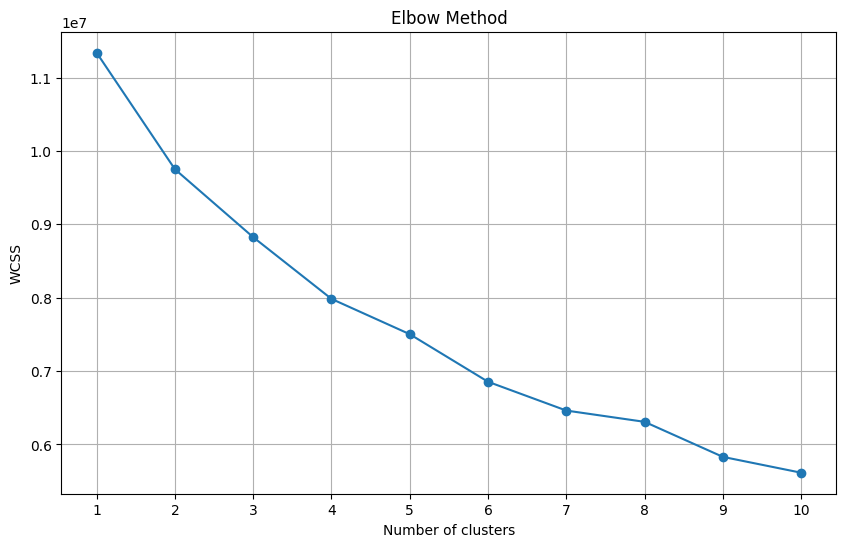

In [32]:
# Function to calculate WCSS (Within-Cluster-Sum-of-Squares) for various values of k
def calculate_wcss(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Plotting the elbow method graph
def plot_elbow(wcss, max_clusters=10):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.xticks(np.arange(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

# Calculate WCSS for different number of clusters
wcss_values = calculate_wcss(df_scaled)

# Plotting the elbow method graph
plot_elbow(wcss_values)

In [ ]:
# Identify the optimal number of clusters using the elbow method
optimal_clusters = 4

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Cluster Evaluation
db_index = davies_bouldin_score(df_scaled, cluster_labels)
ch_index = calinski_harabasz_score(df_scaled, cluster_labels)
sil_score = silhouette_score(df_scaled, cluster_labels)

# Display the results
print("Cluster Evaluation Metrics:")
print(f"Optimal Number of Clusters (from Elbow Method): {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Silhouette Score: {sil_score}")


Cluster Evaluation Metrics:
Optimal Number of Clusters (from Elbow Method): 4
Davies-Bouldin Index: 1.797910807097407
Calinski-Harabasz Index: 63520.73667350724
Silhouette Score: 0.26644966248690843


In [37]:
# Add cluster labels to the original dataframe
df_reduced['cluster'] = cluster_labels

# Compute the mean of each feature for each cluster
cluster_summary = df_reduced.groupby('cluster').mean()
print(cluster_summary)

               0         2         3         4         5         6         7   \
cluster                                                                         
0        3.000000  0.000000  0.046800  0.129667  0.000000  0.953200  0.022406   
1        1.231774  0.000000  0.000029  0.998539  0.523275  0.013635  0.233235   
2        2.632458  0.000000  0.922732  0.032962  0.007256  0.909717  0.328546   
3        1.823769  0.000000  0.000000  0.176231  1.000000  0.836242  0.000000   
4        3.000000  0.000000  0.158961  0.153085  0.853275  0.240934  0.957943   
5        2.235041  0.000000  0.103338  0.251354  0.735544  0.981974  0.110038   
6        1.350976  0.000000  0.811254  0.725181  0.445457  0.506036  0.520211   
7        1.763885  0.932684  0.066444  0.059610  0.267665  0.749200  0.126054   

                  14        15        16  ...        22        23        24  \
cluster                                   ...                                 
0        2893.588906  0.001179 

In [38]:
# Add cluster labels to the original dataframe
df_reduced['cluster'] = cluster_labels

In [39]:
# Compute the mean of each feature for each cluster
cluster_summary = df_reduced.groupby('cluster').mean()
cluster_summary

,0,2,3,4,5,6,7,14,15,16,...,22,23,24,25,26,27,28,29,30,31
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.000000,0.000000,0.046800,0.129667,0.000000,0.953200,0.022406,2893.588906,0.001179,0.000000,...,0.000000,0.000000,0.000000,0.012514,1.000000,0.012514,1.356029,0.974659,1.000000,-0.125051
1,1.231774,0.000000,0.000029,0.998539,0.523275,0.013635,0.233235,3281.446733,0.004956,0.028130,...,0.034747,0.047323,0.589676,0.453092,0.177719,0.813114,1.770947,0.848664,0.624853,0.073291
2,2.632458,0.000000,0.922732,0.032962,0.007256,0.909717,0.328546,2802.964071,0.001695,0.027452,...,0.000000,0.000000,0.316279,0.900042,0.974418,0.660857,2.298277,0.463236,0.709303,0.051072
3,1.823769,0.000000,0.000000,0.176231,1.000000,0.836242,0.000000,2812.000000,0.000000,0.000000,...,0.001997,0.141218,0.142568,0.673496,0.166528,0.202188,2.209008,0.858740,0.164743,0.096909
4,3.000000,0.000000,0.158961,0.153085,0.853275,0.240934,0.957943,2796.853376,0.024592,0.154196,...,0.000000,0.000000,0.000000,0.099964,1.000000,0.060047,1.322767,0.936278,1.000000,-0.102987
5,2.235041,0.000000,0.103338,0.251354,0.735544,0.981974,0.110038,3145.553467,0.007129,0.117531,...,0.000000,0.047997,0.627989,0.899938,0.915095,0.899938,1.476569,0.870994,1.000000,0.103718
6,1.350976,0.000000,0.811254,0.725181,0.445457,0.506036,0.520211,3141.041662,0.053358,0.900561,...,0.014175,0.843268,0.527056,0.409992,0.546836,0.434677,3.543549,0.765064,0.504366,0.503997
7,1.763885,0.932684,0.066444,0.059610,0.267665,0.749200,0.126054,2949.154551,0.357662,0.702530,...,0.812445,0.063681,0.021082,0.188281,0.707473,0.876563,3.602646,0.514103,0.280459,0.382229


In [ ]:
# Step 2: Plot the mean values of features for each cluster
def plot_cluster_summary(cluster_summary):
    cluster_summary.T.plot(kind='bar', figsize=(14, 8), legend=True)
    plt.title('Cluster Characteristics')
    plt.ylabel('Mean Feature Values')
    plt.xlabel('Features')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

plot_cluster_summary(cluster_summary)

In [33]:
# Identify the optimal number of clusters using the elbow method
optimal_clusters = 8

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Cluster Evaluation
db_index = davies_bouldin_score(df_scaled, cluster_labels)
ch_index = calinski_harabasz_score(df_scaled, cluster_labels)
sil_score = silhouette_score(df_scaled, cluster_labels)

# Display the results
print("Cluster Evaluation Metrics:")
print(f"Optimal Number of Clusters (from Elbow Method): {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")
print(f"Silhouette Score: {sil_score}")


Cluster Evaluation Metrics:
Optimal Number of Clusters (from Elbow Method): 8
Davies-Bouldin Index: 1.6264786474384225
Calinski-Harabasz Index: 51664.7922998511
Silhouette Score: 0.3497495504614968


In [35]:
df_reduced.columns

Index([ 0,  2,  3,  4,  5,  6,  7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [40]:
import pandas as pd

# Assuming df_reduced is your dataframe with cluster labels already assigned
cluster_summary = df_reduced.groupby('cluster').mean()

# Display the summary table
cluster_summary


,0,2,3,4,5,6,7,14,15,16,...,22,23,24,25,26,27,28,29,30,31
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.000000,0.000000,0.046800,0.129667,0.000000,0.953200,0.022406,2893.588906,0.001179,0.000000,...,0.000000,0.000000,0.000000,0.012514,1.000000,0.012514,1.356029,0.974659,1.000000,-0.125051
1,1.231774,0.000000,0.000029,0.998539,0.523275,0.013635,0.233235,3281.446733,0.004956,0.028130,...,0.034747,0.047323,0.589676,0.453092,0.177719,0.813114,1.770947,0.848664,0.624853,0.073291
2,2.632458,0.000000,0.922732,0.032962,0.007256,0.909717,0.328546,2802.964071,0.001695,0.027452,...,0.000000,0.000000,0.316279,0.900042,0.974418,0.660857,2.298277,0.463236,0.709303,0.051072
3,1.823769,0.000000,0.000000,0.176231,1.000000,0.836242,0.000000,2812.000000,0.000000,0.000000,...,0.001997,0.141218,0.142568,0.673496,0.166528,0.202188,2.209008,0.858740,0.164743,0.096909
4,3.000000,0.000000,0.158961,0.153085,0.853275,0.240934,0.957943,2796.853376,0.024592,0.154196,...,0.000000,0.000000,0.000000,0.099964,1.000000,0.060047,1.322767,0.936278,1.000000,-0.102987
5,2.235041,0.000000,0.103338,0.251354,0.735544,0.981974,0.110038,3145.553467,0.007129,0.117531,...,0.000000,0.047997,0.627989,0.899938,0.915095,0.899938,1.476569,0.870994,1.000000,0.103718
6,1.350976,0.000000,0.811254,0.725181,0.445457,0.506036,0.520211,3141.041662,0.053358,0.900561,...,0.014175,0.843268,0.527056,0.409992,0.546836,0.434677,3.543549,0.765064,0.504366,0.503997
7,1.763885,0.932684,0.066444,0.059610,0.267665,0.749200,0.126054,2949.154551,0.357662,0.702530,...,0.812445,0.063681,0.021082,0.188281,0.707473,0.876563,3.602646,0.514103,0.280459,0.382229


In [41]:
comparison_table = cluster_summary.T
comparison_table.columns = [f'Cluster {i}' for i in range(1, len(comparison_table.columns) + 1)]

# Display the comparison table
comparison_table


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,3.000000,1.231774,2.632458,1.823769,3.000000,2.235041,1.350976,1.763885
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932684
3,0.046800,0.000029,0.922732,0.000000,0.158961,0.103338,0.811254,0.066444
4,0.129667,0.998539,0.032962,0.176231,0.153085,0.251354,0.725181,0.059610
5,0.000000,0.523275,0.007256,1.000000,0.853275,0.735544,0.445457,0.267665
6,0.953200,0.013635,0.909717,0.836242,0.240934,0.981974,0.506036,0.749200
7,0.022406,0.233235,0.328546,0.000000,0.957943,0.110038,0.520211,0.126054
14,2893.588906,3281.446733,2802.964071,2812.000000,2796.853376,3145.553467,3141.041662,2949.154551
15,0.001179,0.004956,0.001695,0.000000,0.024592,0.007129,0.053358,0.357662
16,0.000000,0.028130,0.027452,0.000000,0.154196,0.117531,0.900561,0.702530


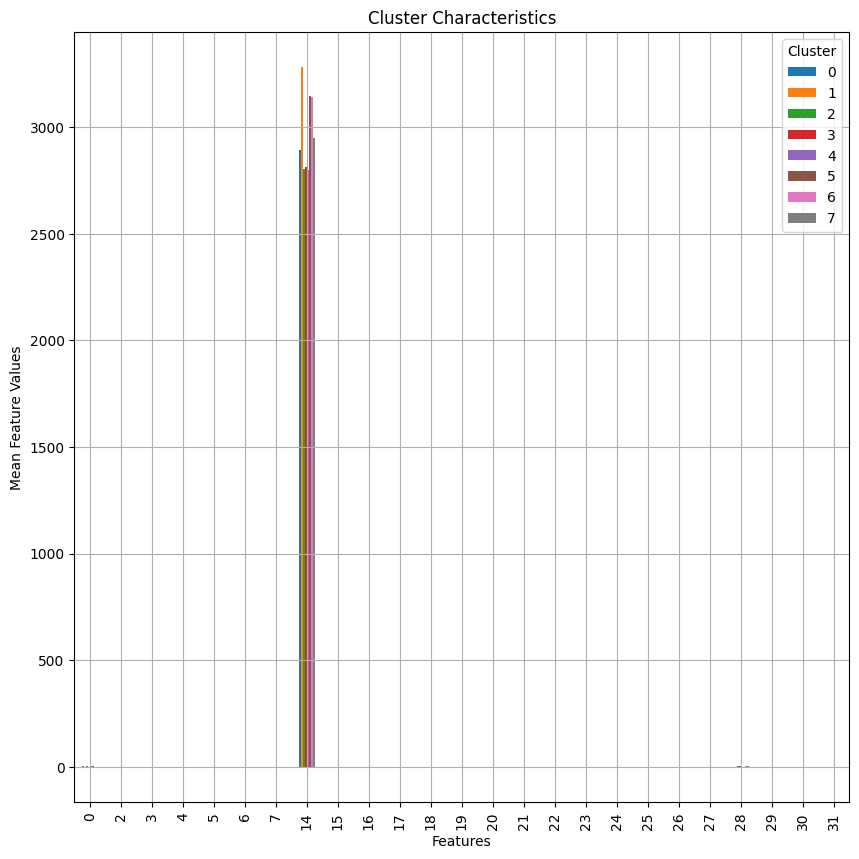

In [ ]:
import matplotlib.pyplot as plt

# Plotting the mean values of features for each cluster
def plot_cluster_summary(cluster_summary):
    cluster_summary.T.plot(kind='bar', figsize=(10, 10), legend=True)
    plt.title('Cluster Characteristics')
    plt.ylabel('Mean Feature Values')
    plt.xlabel('Features')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

plot_cluster_summary(cluster_summary)


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the summary table
cluster_summary = df_reduced.groupby('cluster').mean()
cluster_summary

,0,2,3,4,5,6,7,14,15,16,...,22,23,24,25,26,27,28,29,30,31
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.000000,0.000000,0.046800,0.129667,0.000000,0.953200,0.022406,2893.588906,0.001179,0.000000,...,0.000000,0.000000,0.000000,0.012514,1.000000,0.012514,1.356029,0.974659,1.000000,-0.125051
1,1.231774,0.000000,0.000029,0.998539,0.523275,0.013635,0.233235,3281.446733,0.004956,0.028130,...,0.034747,0.047323,0.589676,0.453092,0.177719,0.813114,1.770947,0.848664,0.624853,0.073291
2,2.632458,0.000000,0.922732,0.032962,0.007256,0.909717,0.328546,2802.964071,0.001695,0.027452,...,0.000000,0.000000,0.316279,0.900042,0.974418,0.660857,2.298277,0.463236,0.709303,0.051072
3,1.823769,0.000000,0.000000,0.176231,1.000000,0.836242,0.000000,2812.000000,0.000000,0.000000,...,0.001997,0.141218,0.142568,0.673496,0.166528,0.202188,2.209008,0.858740,0.164743,0.096909
4,3.000000,0.000000,0.158961,0.153085,0.853275,0.240934,0.957943,2796.853376,0.024592,0.154196,...,0.000000,0.000000,0.000000,0.099964,1.000000,0.060047,1.322767,0.936278,1.000000,-0.102987
5,2.235041,0.000000,0.103338,0.251354,0.735544,0.981974,0.110038,3145.553467,0.007129,0.117531,...,0.000000,0.047997,0.627989,0.899938,0.915095,0.899938,1.476569,0.870994,1.000000,0.103718
6,1.350976,0.000000,0.811254,0.725181,0.445457,0.506036,0.520211,3141.041662,0.053358,0.900561,...,0.014175,0.843268,0.527056,0.409992,0.546836,0.434677,3.543549,0.765064,0.504366,0.503997
7,1.763885,0.932684,0.066444,0.059610,0.267665,0.749200,0.126054,2949.154551,0.357662,0.702530,...,0.812445,0.063681,0.021082,0.188281,0.707473,0.876563,3.602646,0.514103,0.280459,0.382229


<Figure size 1500x800 with 0 Axes>

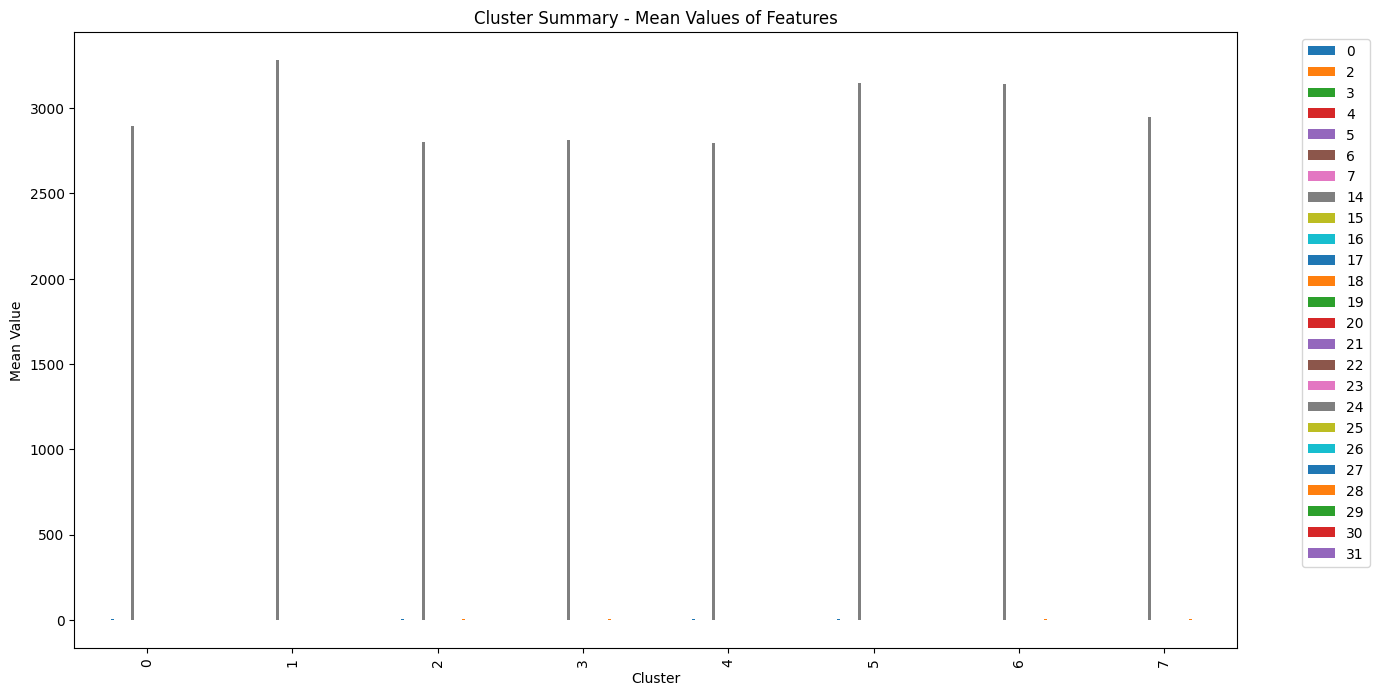

In [44]:
# Convert cluster column to string for better visualization
df_reduced['cluster'] = df_reduced['cluster'].astype(str)

# Bar Plot: Average values of key features for each cluster
plt.figure(figsize=(15, 8))
cluster_summary.plot(kind='bar', figsize=(15, 8))
plt.title('Cluster Summary - Mean Values of Features')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

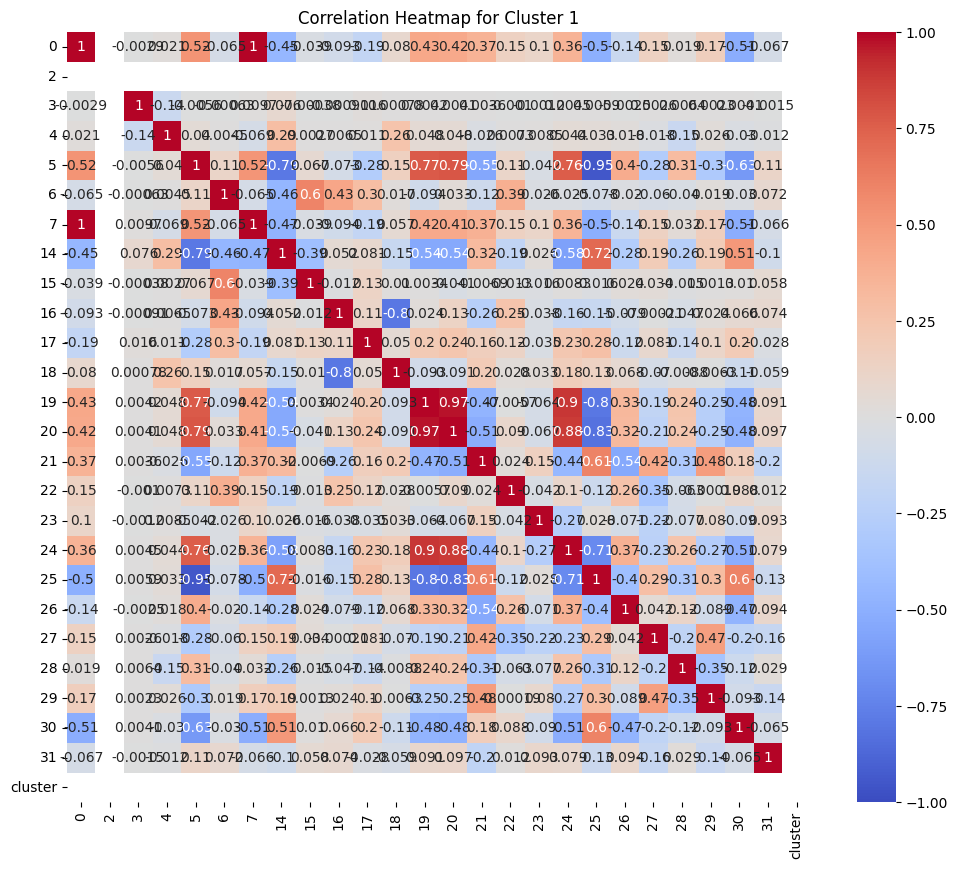

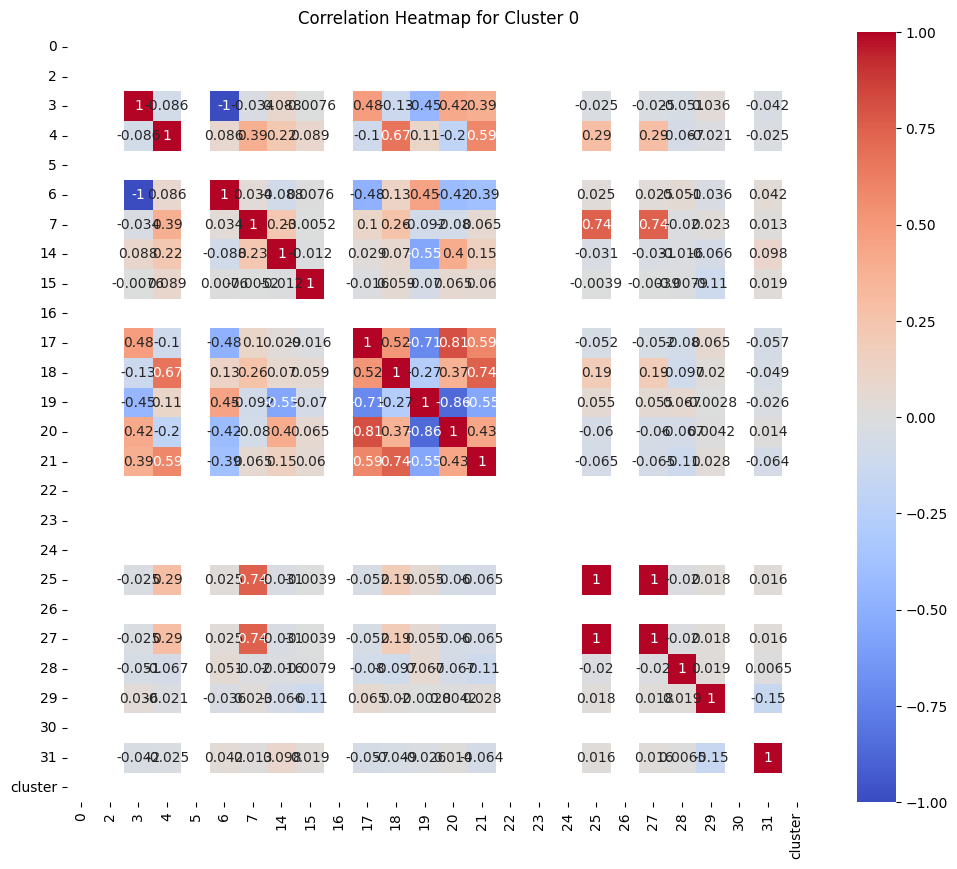

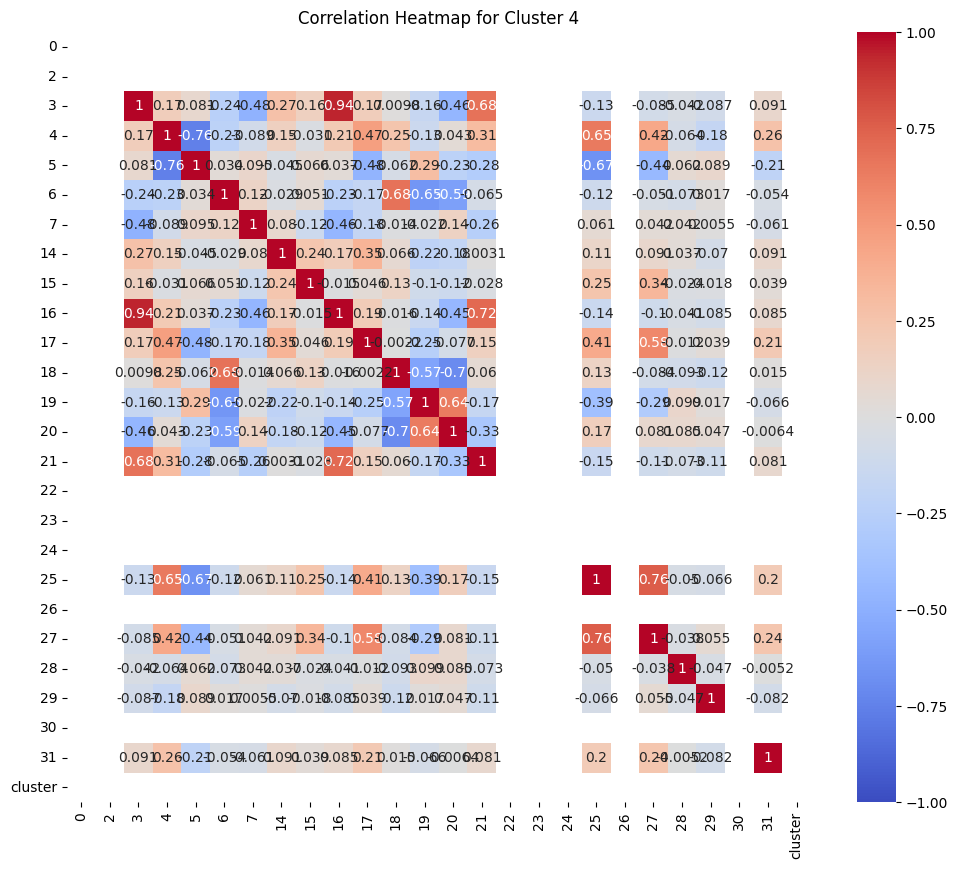

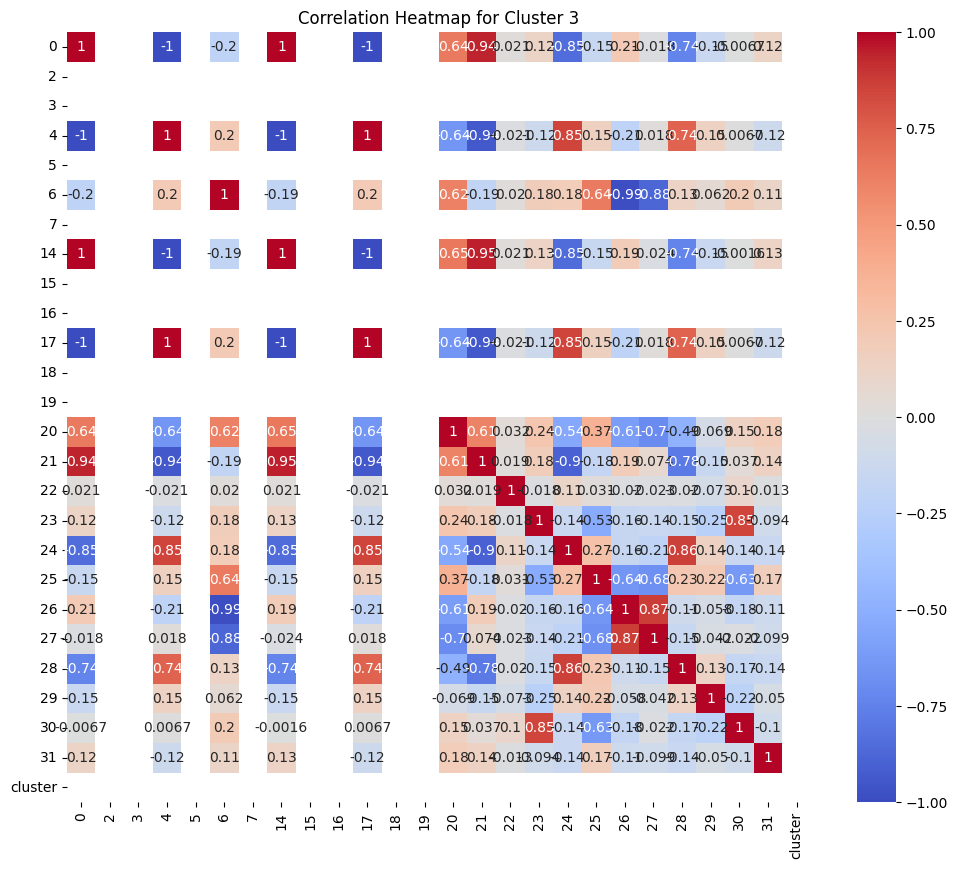

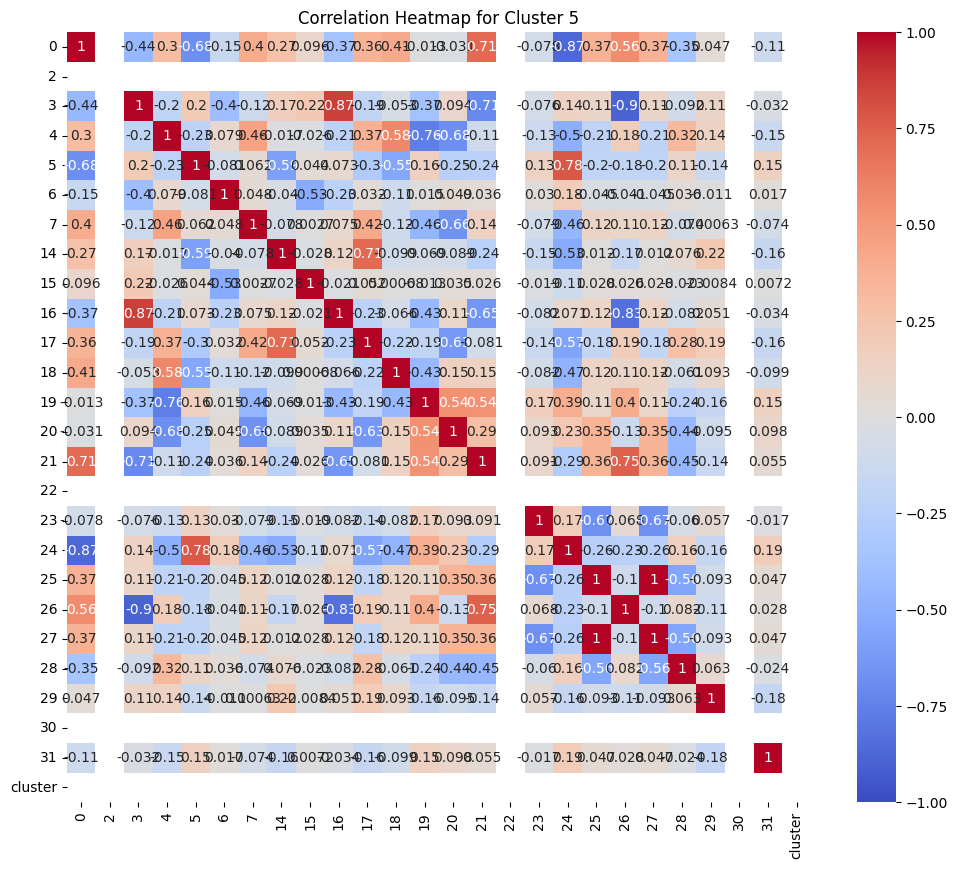

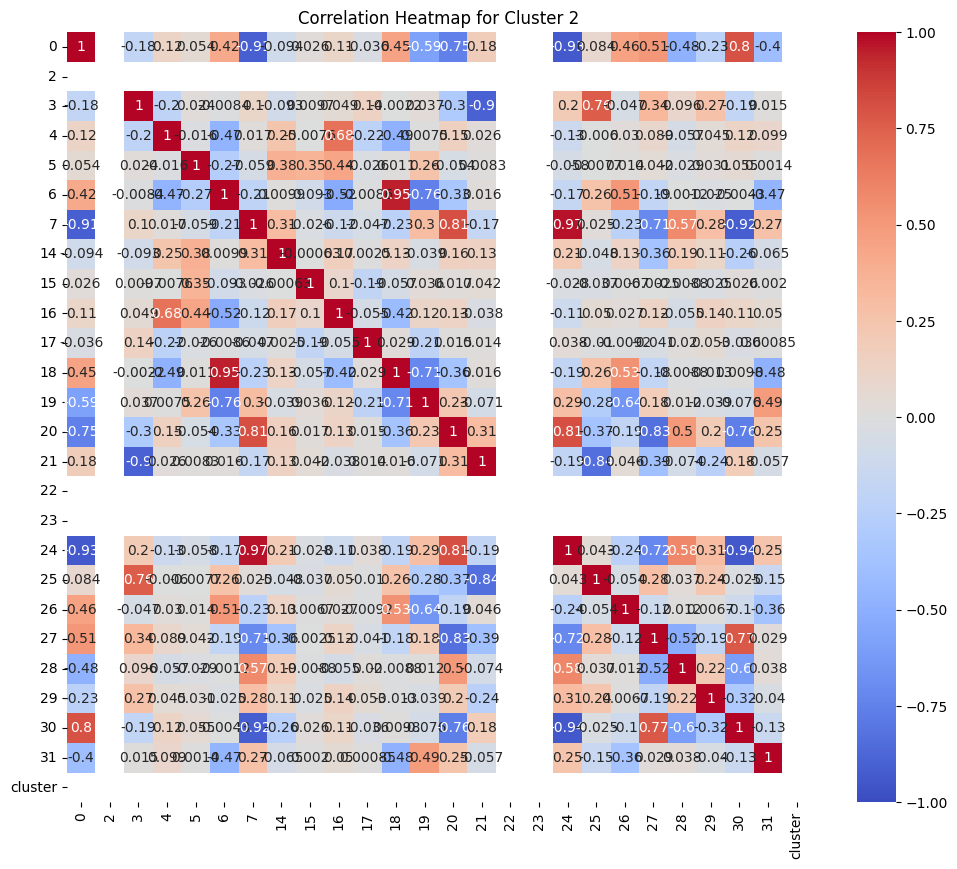

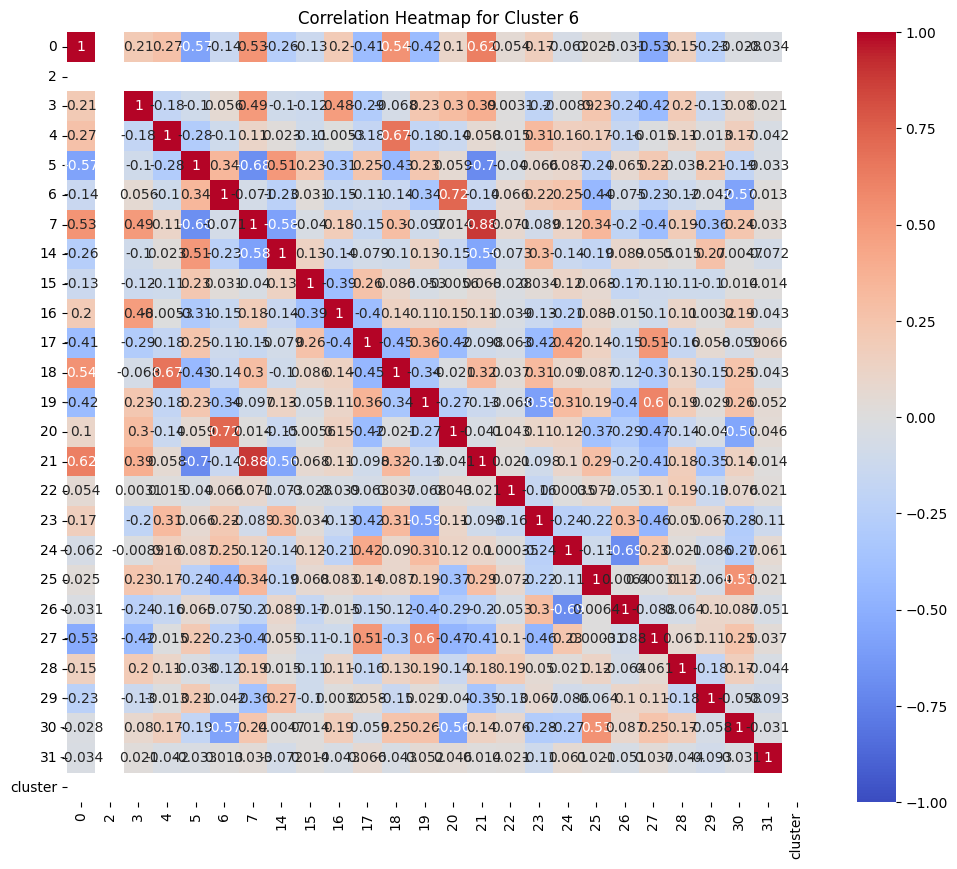

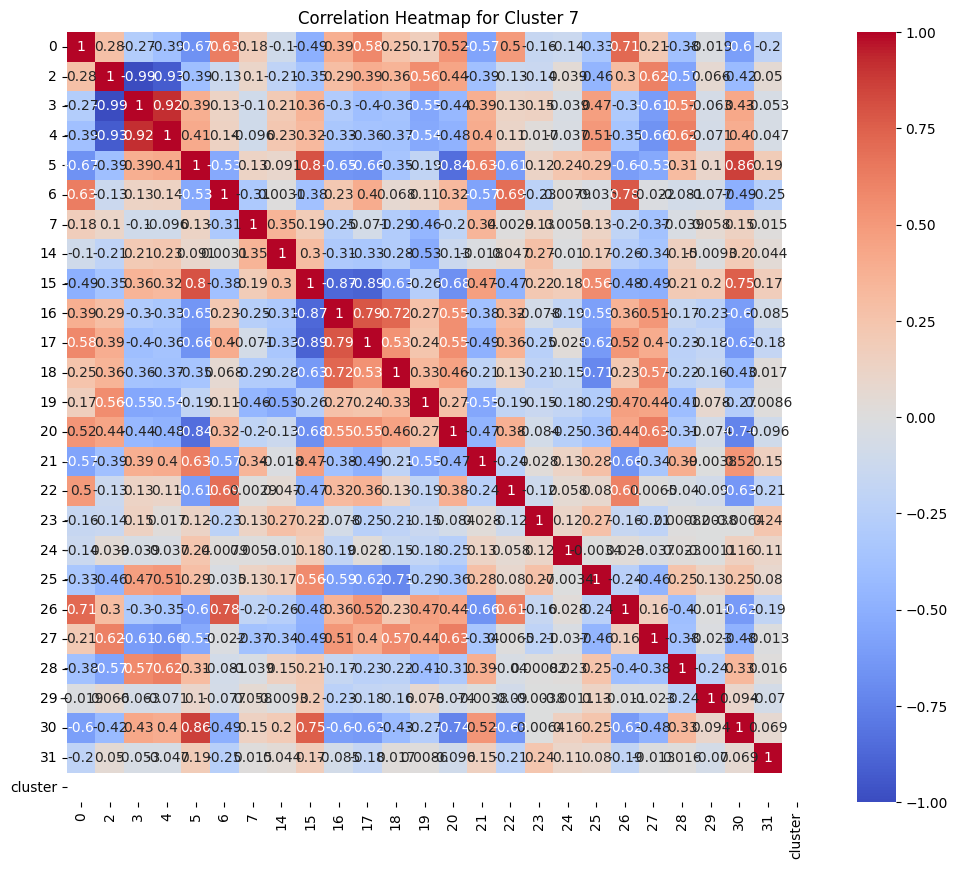

In [47]:
# Heatmap: Correlation matrix of features within each cluster
for cluster in df_reduced['cluster'].unique():
    cluster_data = df_reduced[df_reduced['cluster'] == cluster]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.show()